<a href="https://colab.research.google.com/github/Purohit1999/Data_Science/blob/main/Matplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

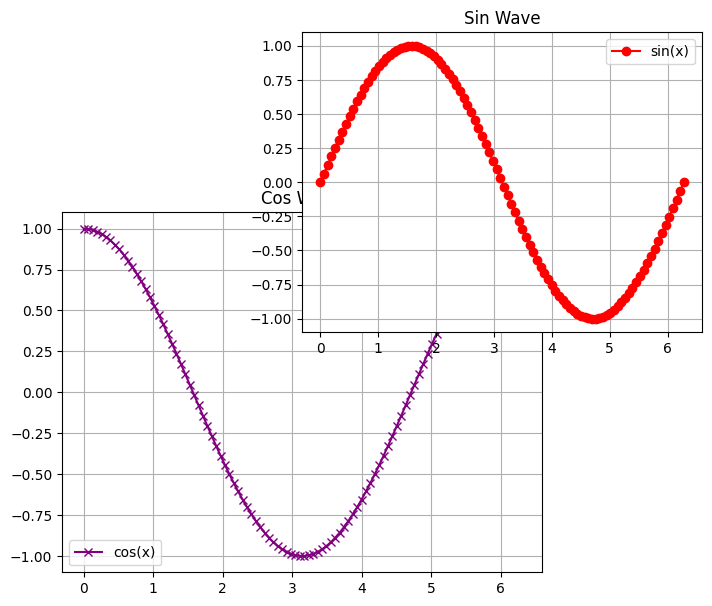

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.linspace(0, 2 * np.pi, 100)
cos_y = np.cos(x)
sin_y = np.sin(x)

# Create the main figure
fig = plt.figure(figsize=(8, 6))

# Cosine plot (base - lower left)
ax_cos = fig.add_axes([0.1, 0.1, 0.6, 0.6])  # [left, bottom, width, height]
ax_cos.plot(x, cos_y, color='purple', marker='x', label='cos(x)')
ax_cos.set_title('Cos Wave')
ax_cos.grid(True)
ax_cos.legend()

# Sine plot (top right overlapping)
ax_sin = fig.add_axes([0.4, 0.5, 0.5, 0.5])  # overlapping coordinates
ax_sin.plot(x, sin_y, color='red', marker='o', label='sin(x)')
ax_sin.set_title('Sin Wave')
ax_sin.grid(True)
ax_sin.legend()

plt.show()


SUBPLOTS : fig, ax = plt.subplots(nrows, ncols)
nrows: number of rows of subplots

ncols: number of columns of subplots

fig: the overall figure container

ax: the array (or single object) of axes (individual plots)

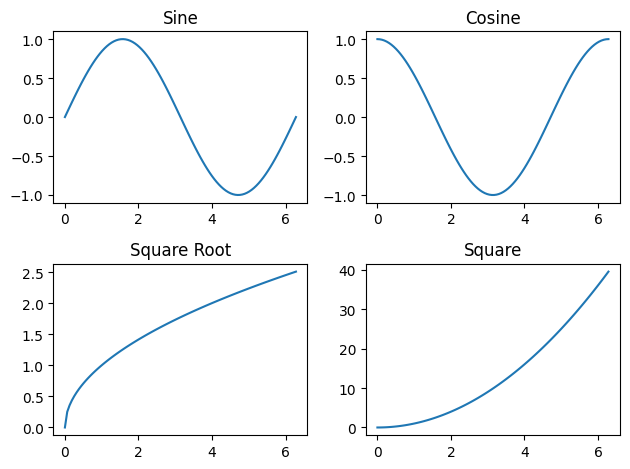

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

fig, axs = plt.subplots(2, 2)  # 2 rows, 2 columns

axs[0, 0].plot(x, y)
axs[0, 0].set_title("Sine")

axs[0, 1].plot(x, np.cos(x))
axs[0, 1].set_title("Cosine")

axs[1, 0].plot(x, np.sqrt(x))
axs[1, 0].set_title("Square Root")

axs[1, 1].plot(x, x**2)
axs[1, 1].set_title("Square")

plt.tight_layout()
plt.show()


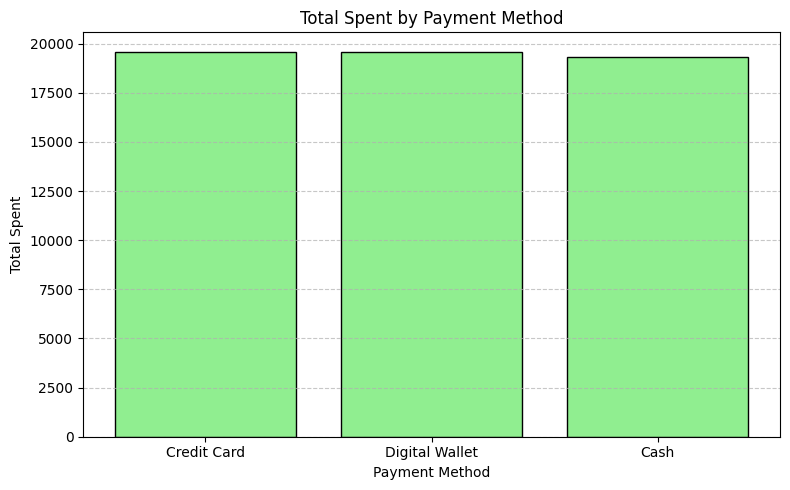

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('/content/dirty_cafe_sales.csv')

# Step 2: Clean invalid entries
df['Payment Method'] = df['Payment Method'].replace(['ERROR', 'UNKNOWN'], np.nan)
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

# Step 3: Drop rows with missing values
df_clean = df.dropna(subset=['Payment Method', 'Total Spent'])

# Step 4: Create pivot table
pivot_df = df_clean.pivot_table(
    values='Total Spent',
    index='Payment Method',
    aggfunc='sum'
).reset_index()

# Optional: Sort for cleaner plot
pivot_df = pivot_df.sort_values(by='Total Spent', ascending=False)

# Step 5: Plotting
plt.figure(figsize=(8, 5))
plt.bar(pivot_df['Payment Method'], pivot_df['Total Spent'], color='lightgreen', edgecolor='black')
plt.title('Total Spent by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Spent')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


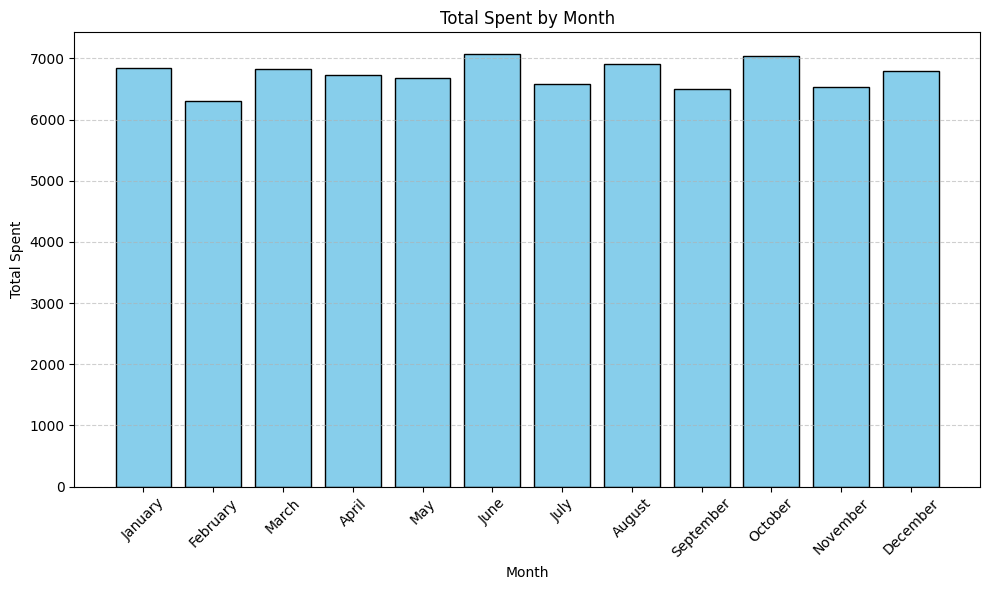

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/dirty_cafe_sales.csv')

# Convert 'Transaction Date' to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Drop rows where date conversion failed
df.dropna(subset=['Transaction Date'], inplace=True)

# Create a new column for Month (as full month name)
df['Month'] = df['Transaction Date'].dt.month_name()

# Replace any errors or unknowns in 'Total Spent' and convert to numeric
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

# Group by Month and sum total spent
monthly_spending = df.groupby('Month')['Total Spent'].sum().reset_index()

# Optional: sort by actual calendar month order
from calendar import month_name
month_order = list(month_name)[1:]  # Jan to Dec
monthly_spending['Month'] = pd.Categorical(monthly_spending['Month'], categories=month_order, ordered=True)
monthly_spending = monthly_spending.sort_values('Month')

# Plot
plt.figure(figsize=(10,6))
plt.bar(monthly_spending['Month'], monthly_spending['Total Spent'], color='skyblue', edgecolor='black')
plt.title('Total Spent by Month')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
